## CVD SHAP
----------------------------------

In [27]:
!pip3 install pickle5

In [28]:
import shap
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pickle5 as pickle
import os
import matplotlib.pyplot as plt

In [29]:
with open(r'./pickles/CVD_all.pkl', 'rb') as handle:
    i = pickle.load(handle)
with open(r'./pickles/CV_final_clf.pkl', 'rb') as handle:
    o = pickle.load(handle)
with open(r'./pickles/CVD_phenbin_all_model_dict.pkl', 'rb') as tmpfile:
    model_dict = pickle.load(tmpfile)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(i, np.asarray(o), random_state=42, test_size=0.2)

In [31]:
xtrain.shape

(3716, 1821)

In [32]:
ytrain.shape

(3716,)

In [33]:
xtest.shape

(930, 1821)

In [34]:
xtrain_means = shap.kmeans(np.asarray(xtrain), 100)

In [36]:
explainer = shap.TreeExplainer(model_dict['All']['RF'], 
                               data = np.asarray(xtrain), 
                               model_output="probability")
shap_values = explainer(np.asarray(xtest))

100%|===================| 1859/1860 [03:18<00:00]        

In [37]:
shap.initjs()

In [38]:
explainer.expected_value[0]

0.4772219248935694

In [39]:
shap_values.values[0:5,0:5,0].shape

(5, 5)

In [40]:
shap_values.values[:,:,0].shape

(930, 1821)

In [42]:
# get probabilities so we can check that the sum of SHAP makes sense
y_probs = model_dict['All']['RF'].predict_proba(xtest)

In [43]:
y_probs[0]

array([0.35406948, 0.64593052])

In [44]:
shap_values.base_values

array([[0.47722192, 0.52277808],
       [0.47722192, 0.52277808],
       [0.47722192, 0.52277808],
       ...,
       [0.47722192, 0.52277808],
       [0.47722192, 0.52277808],
       [0.47722192, 0.52277808]])

In [45]:
shap_values.base_values[0][0]+shap_values.values[0,:,0].sum()

0.3540694786150544

In [46]:
shap_values.values[0,:,1].sum()

0.12315245030263759

In [47]:
shap_values.base_values[0][1]+shap_values.values[0,:,1].sum()

0.6459305254090678

In [48]:
shap_values.values.shape

(930, 1821, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

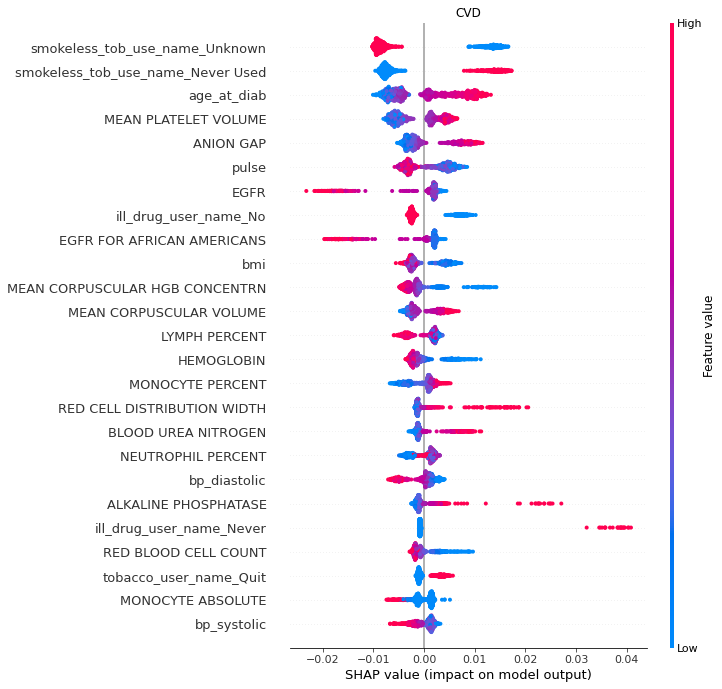

In [51]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, 
                  max_display=25, features=xtest, show=False)
plt.title("CVD")
plt.savefig(r'./figures/CV25-shap.svg', bbox_inches='tight',format='svg')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

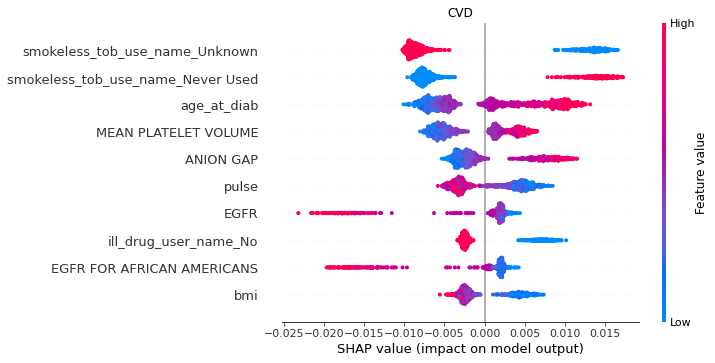

In [50]:
shap.summary_plot(shap_values.values[:,:,1], feature_names=xtrain.columns, 
                  max_display=10, features=xtest, show=False)
plt.title("CVD")
plt.savefig(r'./figures/CV10-shap.svg', bbox_inches='tight',format='svg')
plt.show